In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import os
import statistics 
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

C_4 = ['C4'] # 0
C_5 = ['C5'] # 1
C_6 = ['C6'] # 2
C_7 = ['C7'] # 3
C_8 = ['C8'] # 4


proximal_dorsal_muscles = ['C3-D4','D3-D4'] # Group 5
distal_dorsal_muscles = ['D7','D11', 'D12'] # Group 6


distal_upper_limb = [C_6,C_7,C_8]
proximal_upper_limb = [C_4,C_5]

Cervical_group = [proximal_upper_limb, distal_upper_limb]
Dorsal_group = [proximal_dorsal_muscles, distal_dorsal_muscles]

Whole_group = [Cervical_group, Dorsal_group]

for Big_group in Whole_group:
    print(namestr(Big_group, globals())[0], ' <<<<<<<<<<<<<<<<<<< ',"\n")
    for Group in Big_group:
        print(namestr(Group, globals())[0],'<--------',"\n")
        for i in Group:
            print(i, '\n')
print('\n')

Cervical_group  <<<<<<<<<<<<<<<<<<<  

proximal_upper_limb <-------- 

['C4'] 

['C5'] 

distal_upper_limb <-------- 

['C6'] 

['C7'] 

['C8'] 

Dorsal_group  <<<<<<<<<<<<<<<<<<<  

proximal_dorsal_muscles <-------- 

C3-D4 

D3-D4 

distal_dorsal_muscles <-------- 

D7 

D11 

D12 





In [2]:
data = pd.read_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Patients_first_algorithm.csv', sep=',')

data = data.set_index('Patients')
print(data.shape)
data.head(6)

(68, 100)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.939427,37.060573,0.808100,46.982558,1.290000,46.565346,0.628290,36.528477,0.387120,22.506977,...,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.353930
M_IZ_L002M1NAAA,67.182370,32.817630,0.865200,50.302326,1.280000,46.904616,0.675437,39.269578,0.456413,26.535659,...,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.120670
M_DR_L002M2NAAA,57.795502,42.204498,1.170233,68.036822,1.158333,51.884896,1.011775,58.824138,0.545543,31.717636,...,14.460000,38.444989,39.289854,86.348504,58.529717,-10.233667,-23.182333,12.948667,68.541686,27.807999
M_IZ_L002M2NAAA,62.615632,37.384368,1.116753,64.927519,1.185000,50.658932,0.942554,54.799654,0.585027,34.013178,...,21.800667,43.938594,42.996056,87.371152,63.596024,-4.325000,-20.855000,16.530000,65.081184,35.275158
M_DR_L022M1NAAA,66.656806,33.343194,0.793240,45.328000,1.258333,47.719076,0.629609,35.977656,0.365830,20.904571,...,18.210333,52.488308,6.187594,88.092239,88.358991,-10.264667,-25.095000,14.830333,35.409059,38.451961
M_IZ_L022M1NAAA,66.183206,33.816794,0.824777,47.130095,1.290000,46.534351,0.640877,36.621527,0.406320,23.218286,...,17.600000,46.666667,44.675827,86.784733,67.110433,-8.433333,-20.822000,12.388667,77.670229,35.250891


In [5]:
data.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'HV1', 'HV2', 'KV1', 'KV2', 'AV1', 'Vfdt1',
       'Vfdt2', 'HR1', 'HR2', 'HR3', 'THR1', 'THR2', 'HR4', 'HR5', 'HR6',
       'THR4', 'THR5', 'HR7', 'HR8', 'HR9', 'THR7', 'THR8', 'H1', 'H2', 'H3',
       'H4', 'H5', 'H6', 'H7', 'TH2', 'TH3', 'TH5', 'TH6', 'H8', 'H9', 'H10',
       'H11', 'H12', 'H13', 'H14', 'TH9', 'TH10', 'TH12', 'TH13', 'H15', 'H16',
       'H17', 'THR15', 'THR16', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7',
       'TK2', 'TK3', 'TK5', 'TK6', 'K8', 'K9', 'K10', 'TK8', 'TK9', 'K11',
       'K12', 'K13', 'TK11', 'TK12', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'TA2', 'TA3', 'TA5', 'TA6', 'A8', 'A9', 'A10', 'TA8', 'TA9'],
      dtype='object')

In [3]:
field_names_list = data.columns.values
field_names_list = field_names_list

Patient_data_aux = data.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)

field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L

Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))

n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features')

Loaded dataset including 34 samples with 200 features


In [4]:
Labels_sorted = pd.read_csv(r'C:\Users\riul0\Desktop\TFG_Empresa\Labels_first_algorithm.csv', sep=',')

print(Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2.2',"NIVEL LESION BIG CLASS"]].shape)
Labels_sorted[['ASIA', 'NIVEL LESION', 'NIVEL LESION V2', 'NIVEL LESION V2.2',"NIVEL LESION BIG CLASS"]].head(10)

(34, 5)


,ASIA,NIVEL LESION,NIVEL LESION V2,NIVEL LESION V2.2,NIVEL LESION BIG CLASS
0,D,C7,3,1,0
1,D,C7,3,1,0
2,D,C6,2,1,0
3,D,C5,1,0,0
4,D,C7,3,1,0
5,BC,C6,2,1,0
6,D,C6,2,1,0
7,D,C6,2,1,0
8,D,C4,0,0,0
9,E,D7,6,3,1


In [5]:
import scipy
from scipy import interp
# activate latex text rendering ??
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFwe, SelectPercentile, f_classif
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, classification_report, recall_score

import shap
from itertools import compress
from tpot.builtins import StackingEstimator

---

In [32]:
n_splits = 4
n_repeats = 1000

cv = RepeatedStratifiedKFold(n_splits,n_repeats,random_state=36851234)


classifier = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.05, 
                                  min_samples_leaf=4, min_samples_split=12, n_estimators=100)

Pass n_splits=4, n_repeats=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error


---

(34,) (34, 200)
0    25
1     9
Name: NIVEL LESION BIG CLASS, dtype: int64


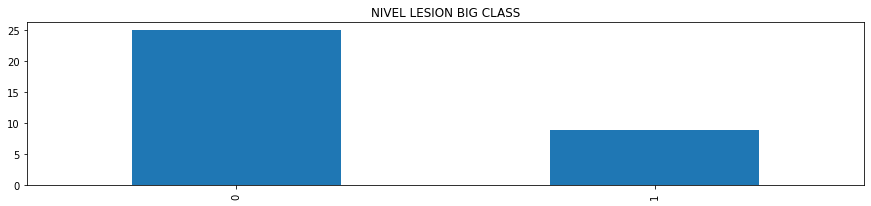

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

from sklearn.metrics import confusion_matrix

scaler = MinMaxScaler()

X = Patient_data_all
X = scaler.fit_transform(X)
Y = Labels_sorted['NIVEL LESION BIG CLASS'].values

print(Y.shape, X.shape)

f, ax = plt.subplots(figsize=(15,3))
print(Labels_sorted['NIVEL LESION BIG CLASS'].value_counts())
Hist = Labels_sorted['NIVEL LESION BIG CLASS'].value_counts().plot.bar(title="NIVEL LESION BIG CLASS")

In [35]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []

feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    if (zzz == 1000) or (zzz == 2000) or(zzz == 3000) :
        print('Results for iteration ',str(zzz),' computed.')
        
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))

Results for iteration  1000  computed.
Results for iteration  2000  computed.
Results for iteration  3000  computed.


Final metrics


Accuracy 0.7478194444444445 , STD :  0.07507821410385766
Sensitivity 0.11845833333333333 , STD :  0.2074035543933614
Specifity 0.975982142857143 , STD :  0.05711394823055917


# No balanced

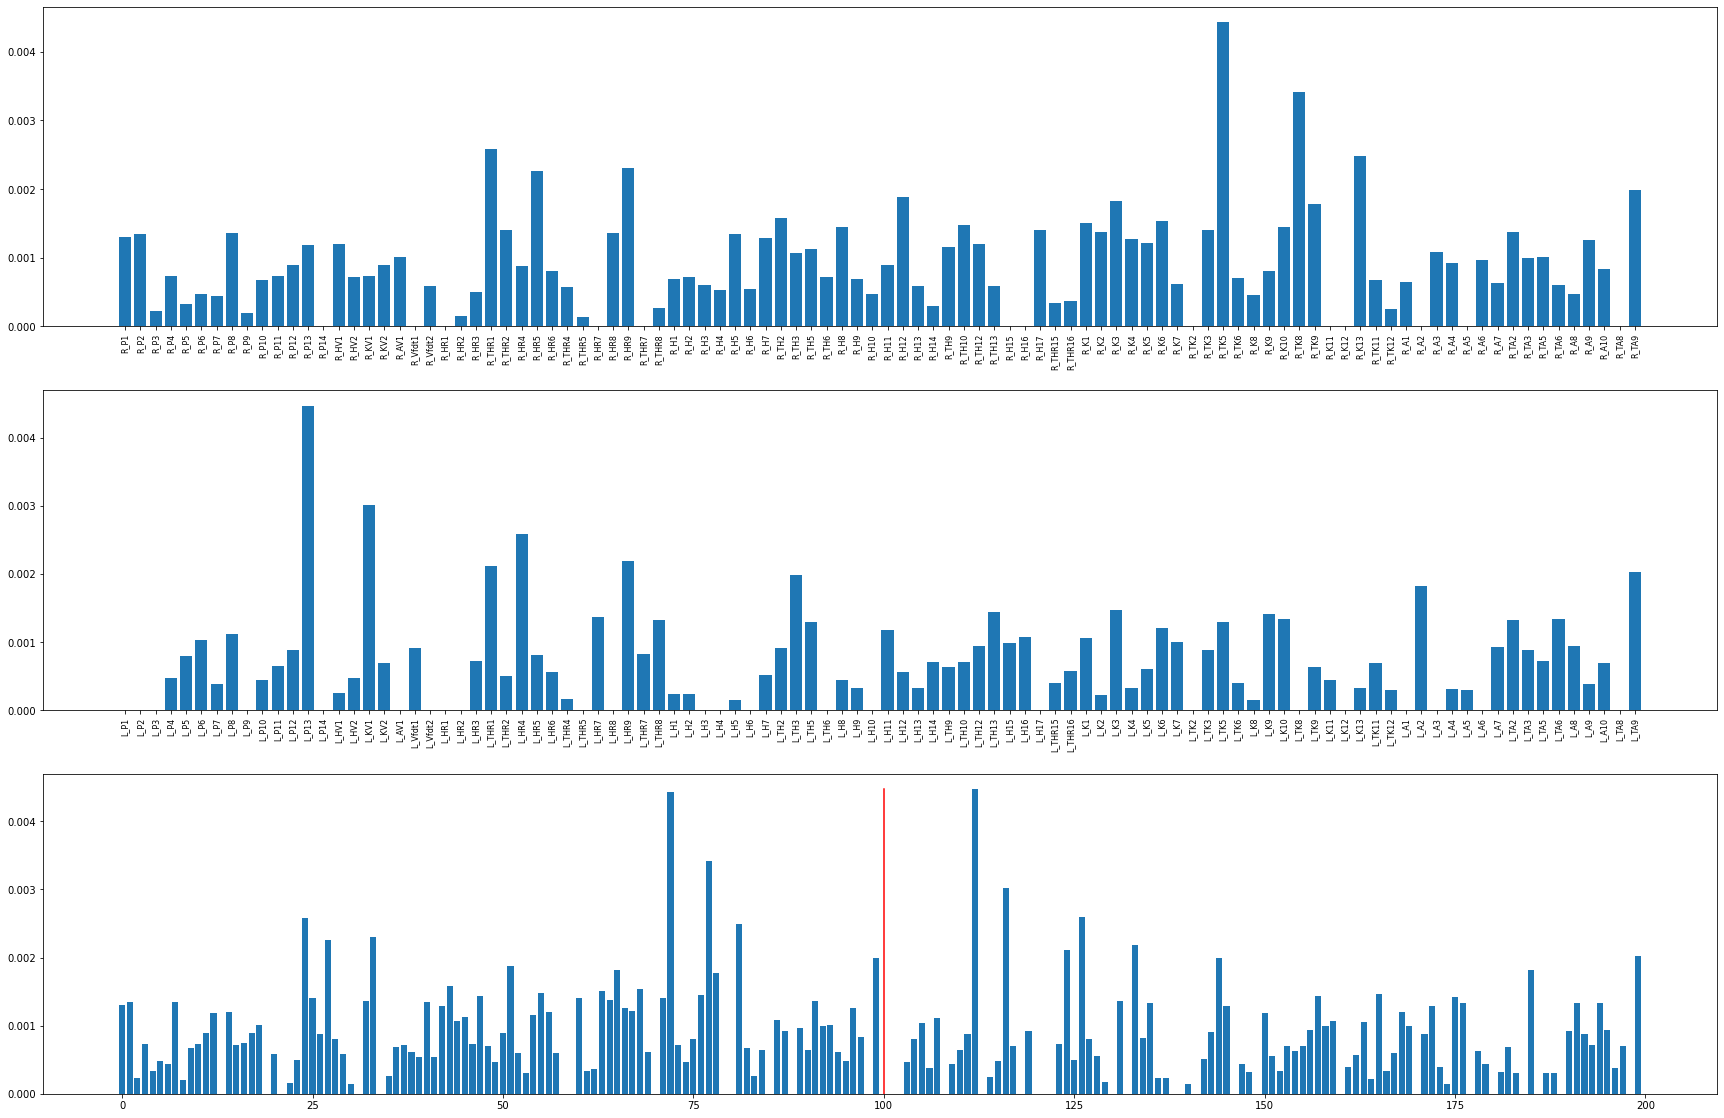

In [36]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

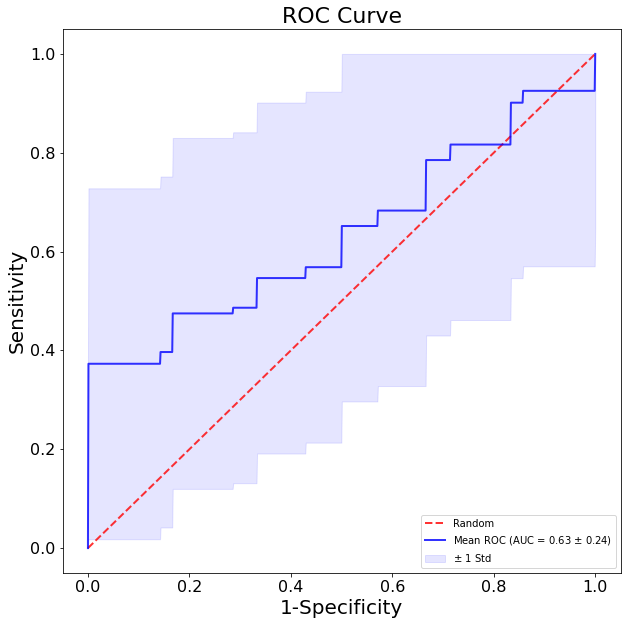

In [37]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot ROC curve from analysis
median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = np.std(aucs)

Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)

Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

# Balanced

In [11]:
import random
index_cervical = Labels_sorted.index[Labels_sorted['NIVEL LESION BIG CLASS'] == 0].tolist()
print(index_cervical)
random_list = random.sample(index_cervical, 10)
print(random_list)

index_dorsal = Labels_sorted.index[Labels_sorted['NIVEL LESION BIG CLASS'] == 1].tolist()
print(index_dorsal)

index_total_example = random_list + index_dorsal
print(index_total_example)

Labels_sorted_example = Labels_sorted.loc[index_total_example]
print(Labels_sorted.shape)
print(Labels_sorted_example.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 21, 22, 23, 24, 25, 26, 28, 30, 32, 33]
[1, 13, 4, 12, 32, 11, 22, 21, 30, 10]
[9, 14, 17, 18, 19, 20, 27, 29, 31]
[1, 13, 4, 12, 32, 11, 22, 21, 30, 10, 9, 14, 17, 18, 19, 20, 27, 29, 31]
(34, 16)
(19, 16)


In [12]:
print(Labels_sorted_example['ID'].to_list())
labels_names_patient_example = Labels_sorted_example['ID'].to_list()

Patient_data_example = []


for i in labels_names_patient_example:
    one = 'M_DR_' + i 
    two = 'M_IZ_' + i 
    Patient_data_example.append(one)
    Patient_data_example.append(two)
    
print('\n',Patient_data_example[0:2])

data.head(2)

['L002M2NAAA', 'L091M2NAAA', 'L031M3NAAA', 'L085M2NAAA', 'L324M1NAAA', 'L077M1NAAA', 'L162M1NAAA', 'L157M5NAAA', 'L285M1NAAA', 'L076M3NAAA', 'L060M1NAAA', 'L139M1NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L217M1NAAA', 'L271M1NAAA', 'L288M1NAAA']

 ['M_DR_L002M2NAAA', 'M_IZ_L002M2NAAA']


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,A7,TA2,TA3,TA5,TA6,A8,A9,A10,TA8,TA9
Patients,,,,,,,,,,,,,,,,,,,,,
M_DR_L002M1NAAA,62.939427,37.060573,0.8081,46.982558,1.29,46.565346,0.628290,36.528477,0.387120,22.506977,...,12.835333,48.494895,43.696704,83.989903,78.162672,13.941667,4.429000,9.512667,63.959892,9.35393
M_IZ_L002M1NAAA,67.182370,32.817630,0.8652,50.302326,1.28,46.904616,0.675437,39.269578,0.456413,26.535659,...,21.860667,49.655097,46.033977,90.285420,70.249037,13.016333,5.810333,7.206000,70.498242,43.12067


In [13]:
data_example = data.loc[Patient_data_example]
print(data_example.shape)

field_names_list = data_example.columns.values
field_names_list = field_names_list

Patient_data_aux = data_example.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)

field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L

Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))

n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features')

(38, 100)
Loaded dataset including 19 samples with 200 features


In [14]:
X = Patient_data_all
X = scaler.fit_transform(X)
Y = Labels_sorted_example['NIVEL LESION BIG CLASS'].values

print(Y.shape, X.shape)

(19,) (19, 200)


In [15]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []
feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    if (zzz == 1000) or (zzz == 2000) or(zzz == 3000) :
        print('Results for iteration ',str(zzz),' computed.')
        
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))

Results for iteration  1000  computed.
Results for iteration  2000  computed.
Results for iteration  3000  computed.


Final metrics


Accuracy 0.5855250000000001 , STD :  0.1637695770740097
Sensitivity 0.41 , STD :  0.3219040574802098
Specifity 0.7742916666666667 , STD :  0.27755164371798546


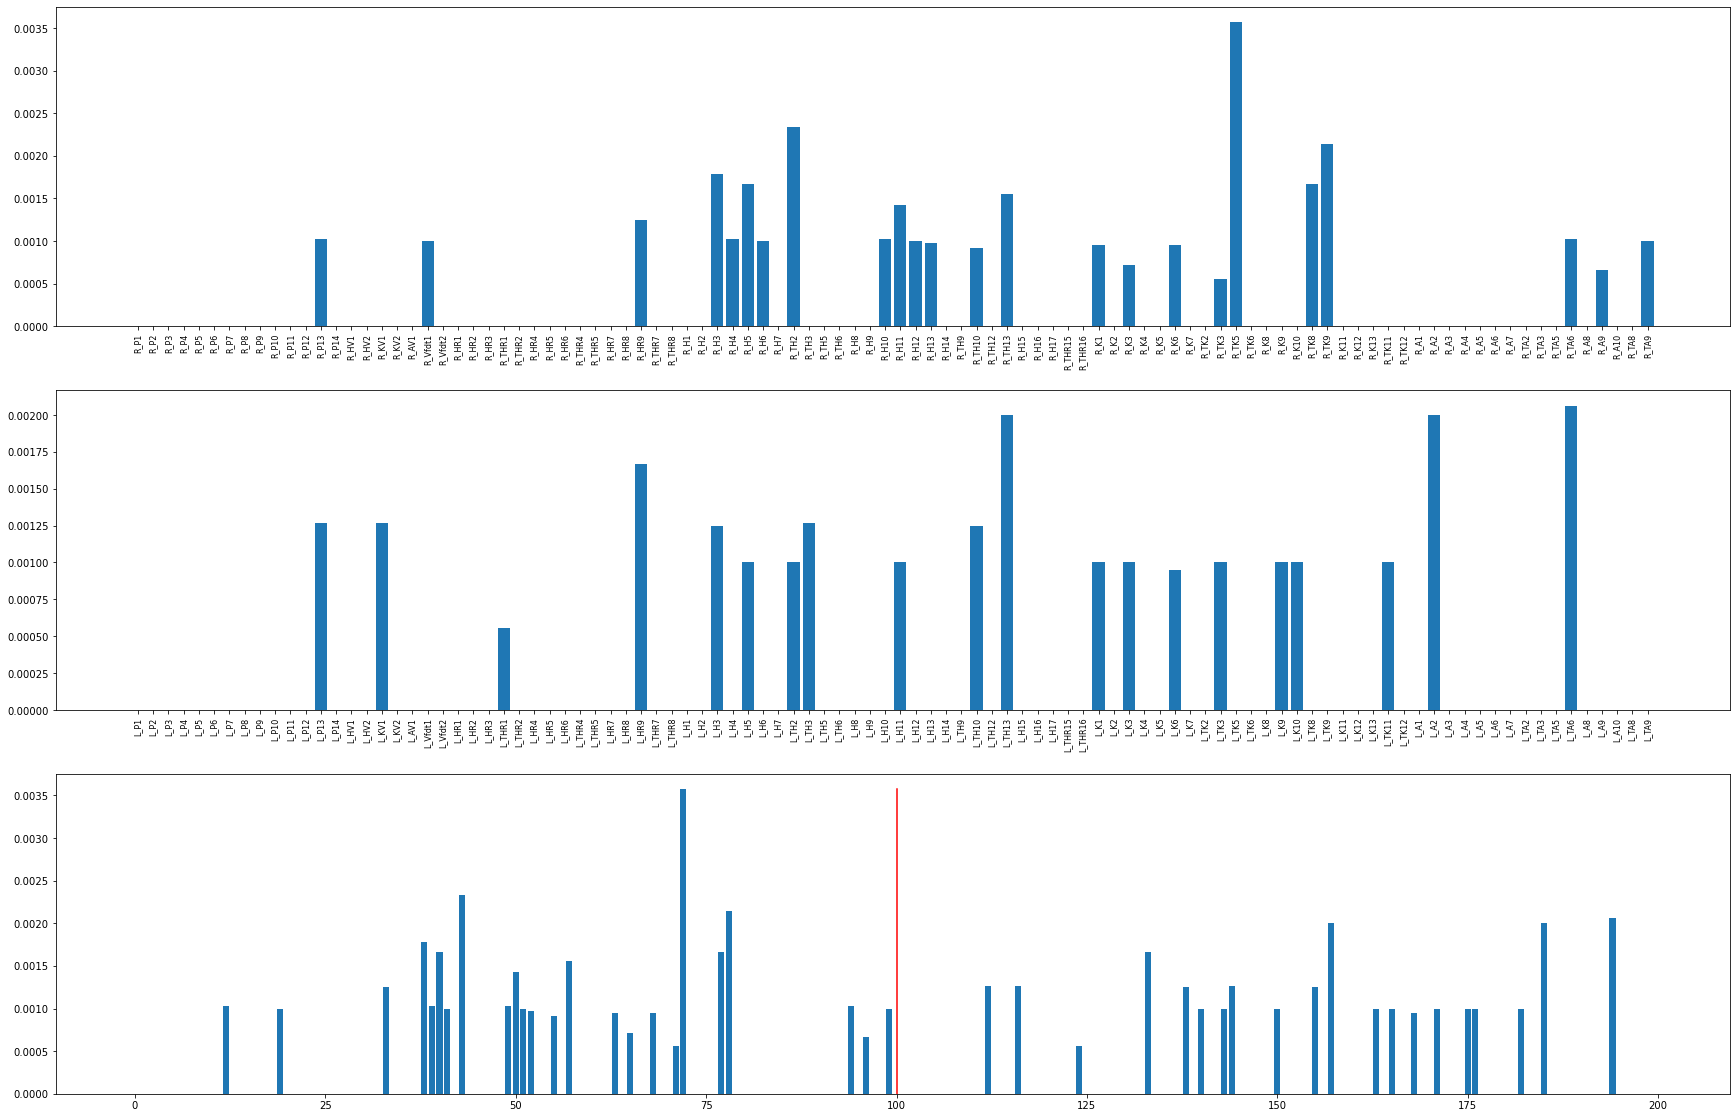

In [16]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

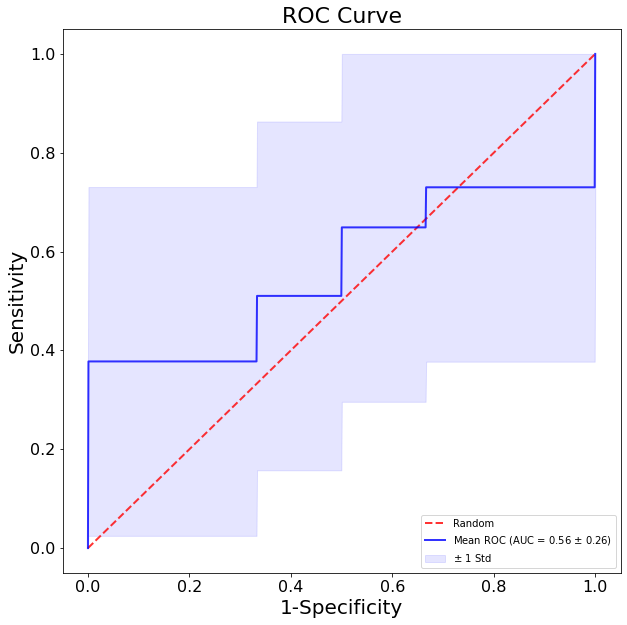

In [17]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot ROC curve from analysis
median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = np.std(aucs)

Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)

Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

## Next groups

In [18]:
field_names_list = data.columns.values
field_names_list = field_names_list

Patient_data_aux = data.values
Patient_data = []
for idx in range(0,len(Patient_data_aux)):
    Patient_data.append(Patient_data_aux[idx,0:])
Patient_data = np.array(Patient_data)

field_names_R = list('R_' + field_names_list)
field_names_L = list('L_' + field_names_list)
field_names_all = field_names_R + field_names_L

Patient_data_all = Patient_data.reshape(int(Patient_data.shape[0]/2), int(2*Patient_data.shape[1]))

n_samples, n_features = Patient_data_all.shape

print('Loaded dataset including',str(n_samples),'samples with',str(n_features),'features', '\n')


print(Labels_sorted.index.tolist(), '\n')
print(Patient_data_all.shape)

Zero_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 0].tolist()
print(Zero_list)
One_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 1].tolist()
print(One_list)
Two_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 2].tolist()
print(Two_list)
Three_list = Labels_sorted.index[Labels_sorted['NIVEL LESION V2.2'] == 3].tolist()
print(Three_list)

Loaded dataset including 34 samples with 200 features 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 

(34, 200)
[3, 8, 10, 11, 12, 13, 22, 25, 26, 28, 32]
[0, 1, 2, 4, 5, 6, 7, 15, 16, 21, 23, 24, 30, 33]
[17, 18, 19, 20]
[9, 14, 27, 29, 31]


In [19]:
upper_limbs = Zero_list + One_list
dorsal_muscles = Two_list + Three_list
upper_limbs = sorted(upper_limbs)
dorsal_muscles = sorted(dorsal_muscles)

print(upper_limbs, len(upper_limbs))
print(dorsal_muscles, len(dorsal_muscles), '\n')

X = scaler.fit_transform(Patient_data_all)
X_upper_limbs = X[upper_limbs]
print(X_upper_limbs.shape, X.shape)

cond = Labels_sorted['NIVEL LESION V2.2'] == 0 
Y_1 = Labels_sorted[cond]['NIVEL LESION V2.2'].values
cond = Labels_sorted['NIVEL LESION V2.2'] == 1 
Y_2 = Labels_sorted[cond]['NIVEL LESION V2.2'].values

Y = np.concatenate((Y_1, Y_2))
print(Y.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 21, 22, 23, 24, 25, 26, 28, 30, 32, 33] 25
[9, 14, 17, 18, 19, 20, 27, 29, 31] 9 

(25, 200) (34, 200)
(25,)


1    14
0    11
3     5
2     4
Name: NIVEL LESION V2.2, dtype: int64


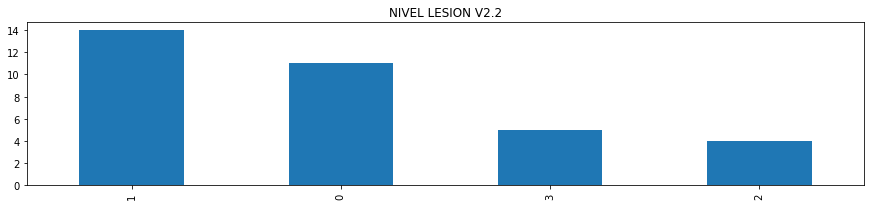

In [20]:
f, ax = plt.subplots(figsize=(15,3))
print(Labels_sorted['NIVEL LESION V2.2'].value_counts())
Hist = Labels_sorted['NIVEL LESION V2.2'].value_counts().plot.bar(title='NIVEL LESION V2.2')

In [21]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []
feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X_upper_limbs, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    if (zzz == 1000) or (zzz == 2000) or(zzz == 3000) :
        print('Results for iteration ',str(zzz),' computed.')
        
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))


Results for iteration  1000  computed.
Results for iteration  2000  computed.
Results for iteration  3000  computed.


Final metrics


Accuracy 0.7726011904761904 , STD :  0.15762808281811283
Sensitivity 0.8002083333333333 , STD :  0.25319477776232097
Specifity 0.7575416666666667 , STD :  0.27061927117364637


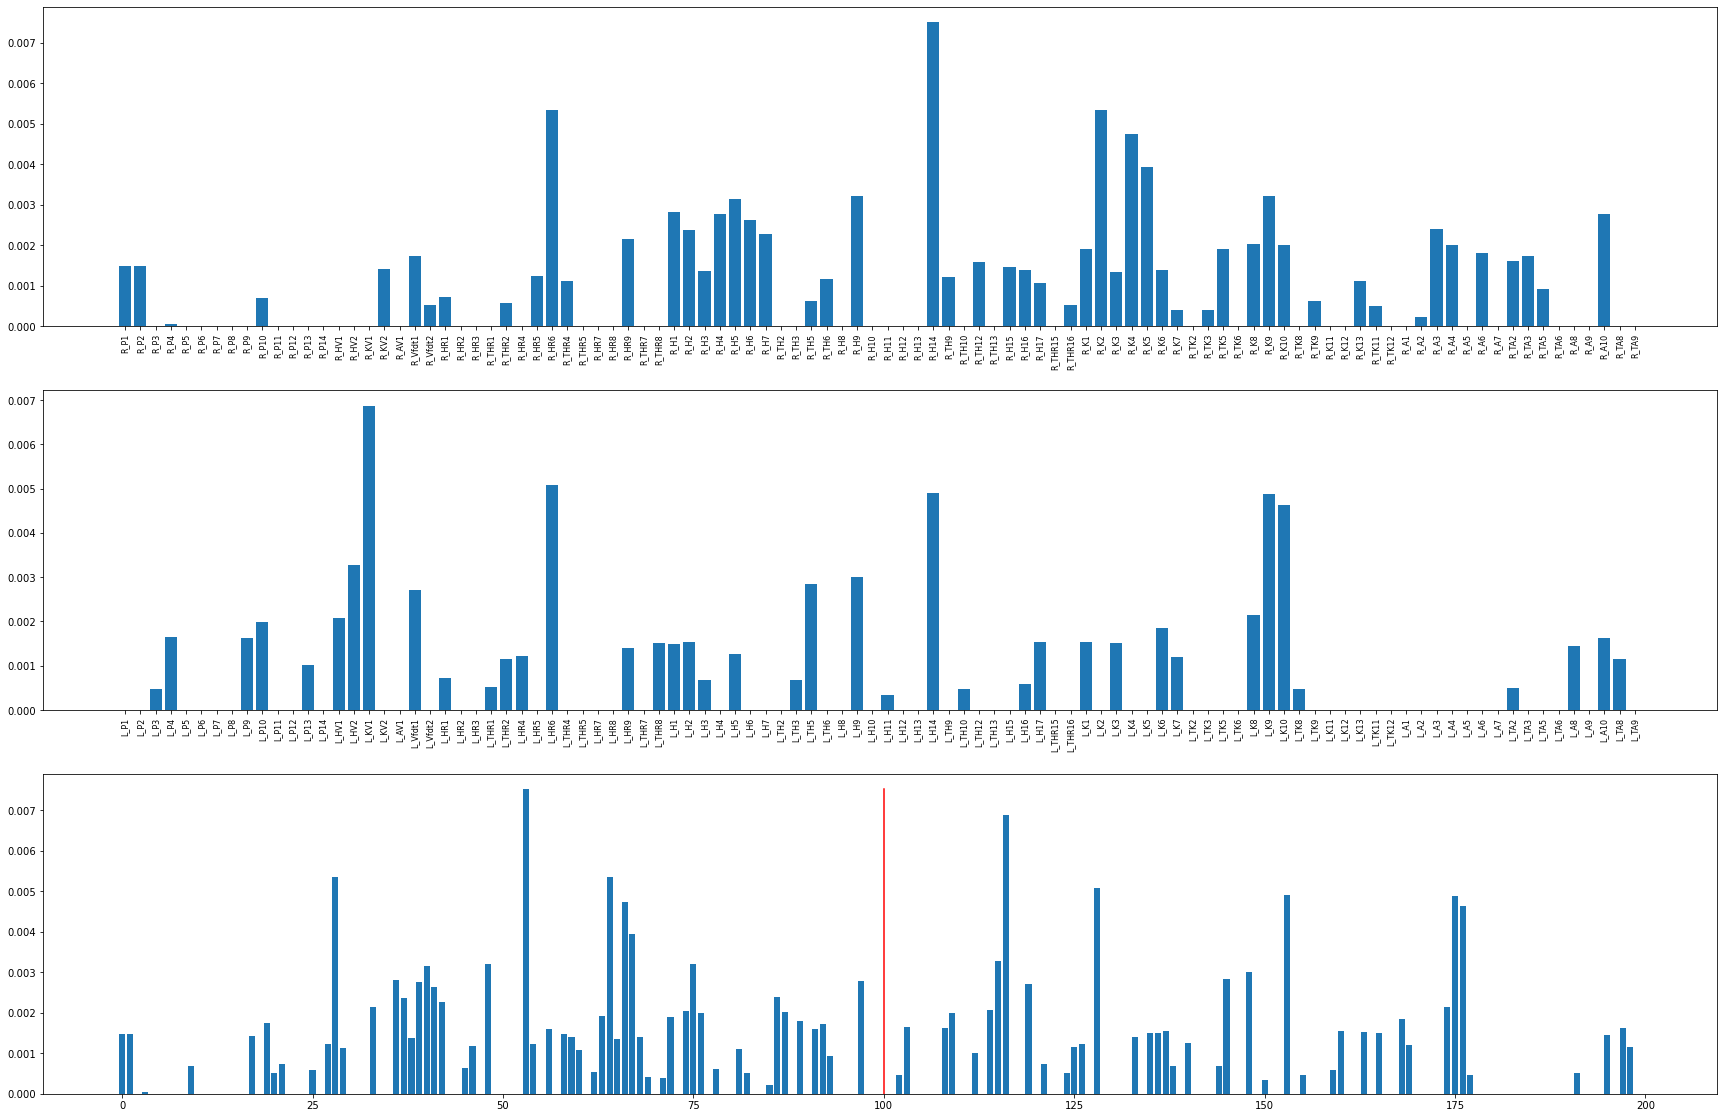

In [22]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

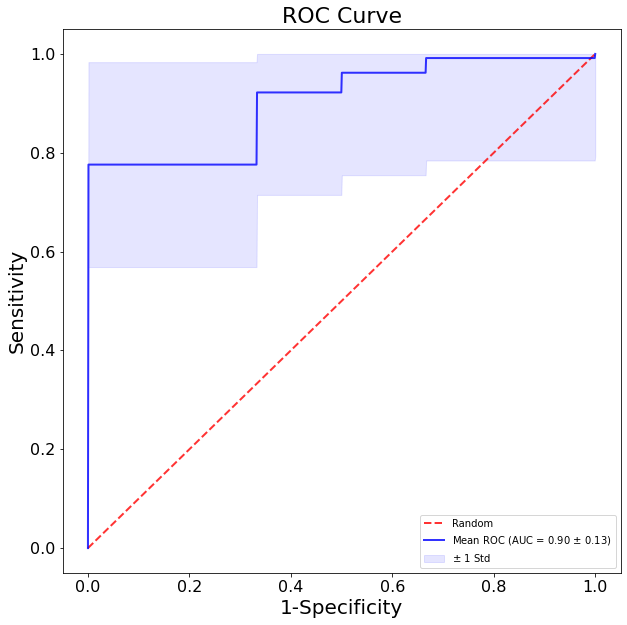

In [23]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot ROC curve from analysis
median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = np.std(aucs)

Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)

Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()

## Last group

In [24]:
X = scaler.fit_transform(Patient_data_all)
X_dorsal_muscles = X[dorsal_muscles]
print(X_dorsal_muscles.shape, X.shape)

cond = Labels_sorted['NIVEL LESION V2.2'] == 2 
Y_1 = Labels_sorted[cond]['NIVEL LESION V2.2'].values
cond = Labels_sorted['NIVEL LESION V2.2'] == 3 
Y_2 = Labels_sorted[cond]['NIVEL LESION V2.2'].values

Y = np.concatenate((Y_1, Y_2))
print(Y.shape)

# Checking
j = 0
for i in dorsal_muscles:
    if (X_dorsal_muscles[j][0] == X[i][0]):
        j += 1
        continue
    else:
        print(j,i)
        j += 1

(9, 200) (34, 200)
(9,)


Replace (2,3) with (0,1)

In [25]:
print(X_dorsal_muscles)
print(Y)
Y = np.where(Y == 2, 0, Y)
print(Y)
Y = np.where(Y == 3, 1, Y)
print(Y)

[[0.5970693  0.4029307  0.66433778 ... 0.1560594  1.         0.82591755]
 [1.         0.         0.25318348 ... 0.30861425 0.6272142  1.        ]
 [0.70769323 0.29230677 0.87752276 ... 0.56377912 0.69794896 0.33210841]
 ...
 [0.48281884 0.51718116 0.79088452 ... 0.23486359 0.88946634 0.82370145]
 [0.4778348  0.5221652  0.46363417 ... 0.25117303 0.         0.88528584]
 [0.38918487 0.61081513 0.8860043  ... 0.34757747 0.76927891 0.84913478]]
[2 2 2 2 3 3 3 3 3]
[0 0 0 0 3 3 3 3 3]
[0 0 0 0 1 1 1 1 1]


In [26]:
# Model Evaluation

performance_list = []
sensitivity_list = []
specificity_list = []

tprs = []   # True prediction errors
aucs = []   # Area unde_listr the curve
Ys = []
Zs = []
feat_importances = []

median_fpr = np.linspace(0, 1, 1000)


zzz = 0

for train, test in cv.split(X_dorsal_muscles, Y): 
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    
    Ys.extend(Y_test) 

    classifier.fit(X_train, Y_train)

    Z = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Z[:, 1])   # Falpse positive and true positive rate
    roc_auc = auc(fpr, tpr) 
    
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_train)
    
    # SHapley Additive exPlanations
    # SHAP : impact of variables taking into account the interaction with other variables.
    
    Y_pred = classifier.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred, labels=[0,1]).ravel()

    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    
    
    performance_list.append(classifier.score(X_test,Y_test))
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    tprs.append(np.interp(median_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    Zs.extend(Z[:, 1])
    
    feat_importances.append(np.median(np.abs(shap_values[1]),axis=0))
    
    if (zzz == 1000) or (zzz == 2000) or(zzz == 3000) :
        print('Results for iteration ',str(zzz),' computed.')
        
    zzz += 1
    
print('\n')
print('Final metrics')
print('\n')
print('Accuracy', np.mean(performance_list), ', STD : ', np.std(performance_list))
print('Sensitivity', np.mean(sensitivity_list), ', STD : ', np.std(sensitivity_list))
print('Specifity', np.mean(specificity_list), ', STD : ', np.std(specificity_list))


Results for iteration  1000  computed.
Results for iteration  2000  computed.
Results for iteration  3000  computed.


Final metrics


Accuracy 0.4583333333333333 , STD :  0.07216878364870323
Sensitivity 0.75 , STD :  0.4330127018922193
Specifity 0.25 , STD :  0.4330127018922193


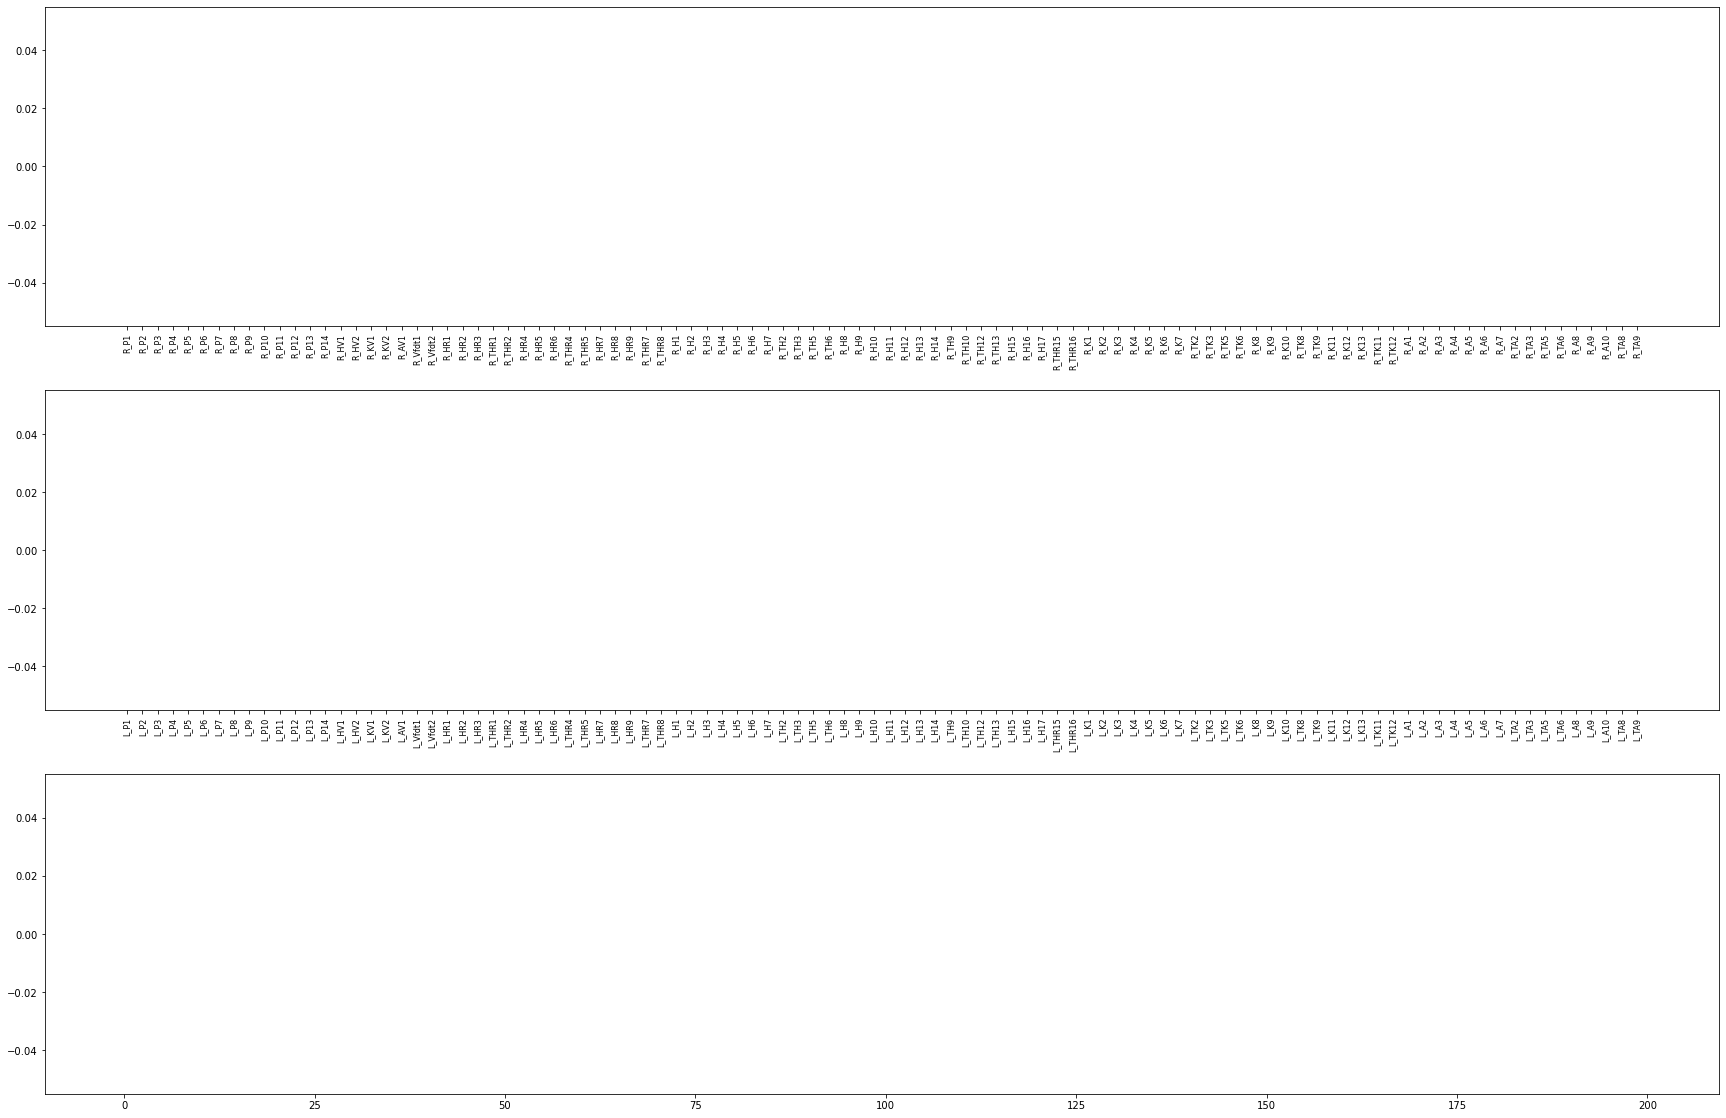

In [27]:
median_importances = np.median(feat_importances, axis=0)
MAD_importances = scipy.stats.median_abs_deviation(feat_importances, scale=1.0, axis=0)

plt.figure(figsize = (30,20))

plt.subplot(3,1,1)

mitad = int(len(median_importances)/2)
mitad_2 = int(len(field_names_all)/2)

plt.bar(range(0,mitad),median_importances[0:mitad])
plt.xticks(np.arange(0,mitad_2), field_names_all[0:mitad_2], 
           rotation= 90, fontsize = 8)

plt.subplot(3,1,2)

plt.bar(range(mitad,len(median_importances)),median_importances[mitad:])
plt.xticks(np.arange(mitad_2,len(field_names_all)), field_names_all[mitad_2:], 
           rotation= 90, fontsize = 8)


plt.subplot(3,1,3)

plt.bar(range(0,len(median_importances)),median_importances)
x_coordinates = [mitad, mitad]
y_coordinates = [0, max(median_importances)]
plt.plot(x_coordinates, y_coordinates, color = 'r')

plt.show()

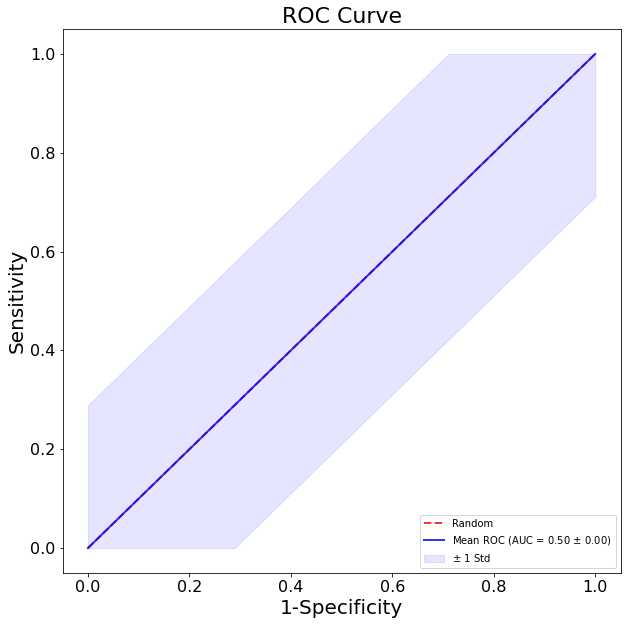

In [28]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

# Plot random ROC curve
Random_roc = ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot ROC curve from analysis
median_tpr = np.mean(tprs, axis=0)
median_tpr[-1] = 1.0
median_auc = auc(median_fpr, median_tpr)
MAD_auc = np.std(aucs)

Median_roc = ax1.plot(median_fpr, median_tpr, color='b',
  label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (median_auc, MAD_auc),
  lw=2, alpha=.8)

MAD_tpr = np.std(tprs)
tprs_upper = np.minimum(median_tpr + MAD_tpr, 1)
tprs_lower = np.maximum(median_tpr - MAD_tpr, 0)

Median_tprs = ax1.fill_between(median_fpr, tprs_lower, tprs_upper, color='blue', alpha=.1,
  label=r'$\pm$ 1 Std')

# Display ROC curves
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax1.tick_params(labelsize=16)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.title('ROC Curve', fontsize=22)
plt.legend(loc="lower right")
plt.show()